# TEMA 1: Reducción de Dimensionalidad e Ingeniería de Características

In [1]:
#pip install sklearn

## **Subtema 1.1 Análisis de Componentes Principales - Código**

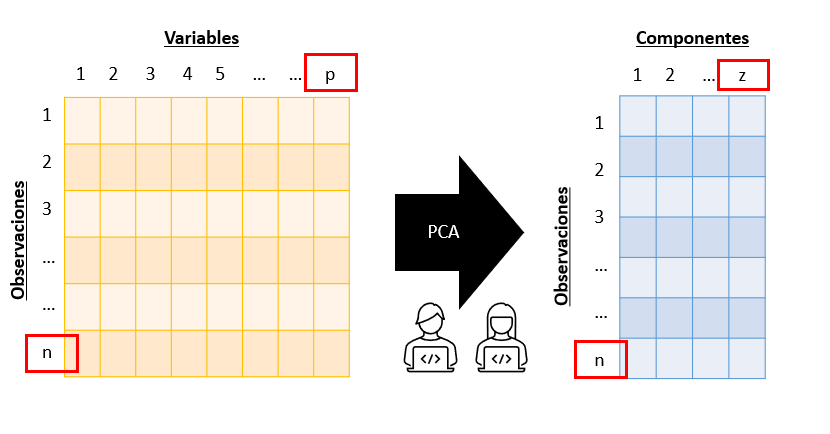

In [3]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
iris = sm.datasets.get_rdataset("iris", "datasets")
datos = iris.data


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

In [5]:
iris

NameError: name 'iris' is not defined

In [5]:
datos

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
print('Media de cada variable')
datos.mean()

Media de cada variable


Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [8]:
print('Desviación estándar de cada variable')
datos.std()

Desviación estándar de cada variable


Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [9]:
datos.var()

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [10]:
#para iris
features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
# Separating out the features
x = datos.loc[:, features]
# Separating out the target
y = datos.loc[:,['Species']]

In [11]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [13]:
#datos_escalados = escalar.fit(datos)
#datos_escalados = escalar.transform(datos)
escalar = StandardScaler() #"z = (x - media) / std"
datos_escalados = escalar.fit(x) #Compute the mean and std to be used for later scaling.
datos_escalados = escalar.transform(x) #Fit to data, then transform it.
datos_escalados 

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [14]:
revisar = pd.DataFrame(datos_escalados, columns = ['Column_A','Column_B','Column_C', 'Columna_D'])
revisar.std() #desv 1
revisar.mean() #media 0

Column_A    -2.775558e-16
Column_B    -9.695948e-16
Column_C    -8.652338e-16
Columna_D   -4.662937e-16
dtype: float64

In [15]:
pca_model = PCA(n_components = 4)

In [16]:
pca_model.fit(revisar)

PCA(n_components=4)

In [17]:
pca_model.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [18]:
# Se combierte el array a dataframe para añadir nombres a los ejes. #vector de loadings, cargas
pd.DataFrame(
    data    = pca_model.components_,
    columns = x.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [19]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.72962445 0.95813207 0.99482129 1.        ]


In [20]:
#proyecciones = np.dot(pca_model.components_, scale(datos).T)
#proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
#proyecciones = proyecciones.transpose().set_index(datos.index)
#proyecciones

proyecciones = np.dot(pca_model.components_, datos_escalados.T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(x.index)
proyecciones

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [21]:
conjunto_1 = proyecciones[["PC1","PC2"]]
conjunto_1.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [22]:
conjunto_2 = proyecciones[["PC1","PC2","PC3"]]
conjunto_2.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [23]:
conjunto_2 = pd.concat([conjunto_2, datos[['Species']]], axis = 1)
conjunto_2

,PC1,PC2,PC3,Species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica
